In [1]:
import un as un
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(11)

In [2]:
def ARMA(phi, theta, basewhite, initial_conditions, mu=0.0):
    out = initial_conditions.tolist().copy()
    ARorder = len(phi)
    MAorder = len(theta)
    for i in range(MAorder, len(basewhite)):
        val = mu + np.dot(np.array(theta), basewhite[i-MAorder:i]) 
        if len(phi) > 0:
              val += np.dot(np.array(phi), out[-ARorder:])
        out.append(val)
    return np.asarray(out[len(initial_conditions):])

In [3]:
def window(s, d):
    assert d > 1
    xs = []
    for i in range(d, len(s)-d):
        xs.append(s[i:i+d])
    return np.stack(xs)

In [4]:
def mask(X, p=0.5):
    ps = np.random.uniform(low=0, high=1, size=X.shape)
    out = X.copy()
    out[ps > p] = np.nan
    return out

In [5]:
def split(X, p=0.8):
    n = X.shape[0]
    thresh = int(n*p)
    return (X[:thresh], X[thresh:])

In [6]:
def evalimpute(m, Xtrue, Xmask):
    errs = []
    for i in range(Xtrue.shape[0]):
        errs.append(np.sqrt(np.mean(np.square(
            Xtrue[i, :] - m.impute_nan(Xmask[i, :])
        ))))
    return errs

In [7]:
ar = []
ar = [0.3, 0.2]
ma3series = ARMA(ar, [0.5, 0.5, 0.5], np.random.normal(size=(10000)), np.array([0., 0.]))

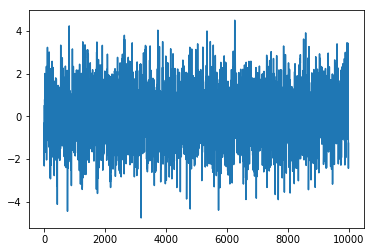

In [8]:
plt.plot(ma3series)

In [9]:
X = window(ma3series, 3)
np.random.shuffle(X)
Xtrain, Xtest = split(X)
Xtrainm, Xtestm = mask(Xtrain), mask(Xtest)

In [10]:
models = [
    un.CovarianceModel(3),
    un.L1ConstantModel(3),
    un.L2ConstantModel(3),
    un.KMeansModel(3, 3),
]

In [11]:
train_performance = []
test_performance = []
for m in models:
    m.train(Xtrain)
    es = evalimpute(m, Xtrain, Xtrainm)
    train_performance.append(np.mean(es))
    print(np.mean(es))
    es = evalimpute(m, Xtest, Xtestm)
    test_performance.append(np.mean(es))
    print(np.mean(es))

0.4382920646684103
0.4338247439891548
0.6488320253764254
0.6654488456942085
0.6489287458219453
0.6655596046526016
0.5692864613285209
0.5747532858468128


In [12]:
cmodels = [un.CovarianceModel(d) for d in range(2, 20)]

In [13]:
Tr = np.zeros((len(cmodels), 1))
Te = np.zeros((len(cmodels), 1))
for (i, m) in enumerate(cmodels):
    X = window(ma3series, i+2)
    np.random.shuffle(X)
    Xtrain, Xtest = split(X)
    Xtrainm, Xtestm = mask(Xtrain), mask(Xtest)
    m.train(Xtrain)
    es = evalimpute(m, Xtrain, Xtrainm)
    Tr[i, 0] = np.mean(es)
    es = evalimpute(m, Xtest, Xtestm)
    Te[i, 0] = np.mean(es)

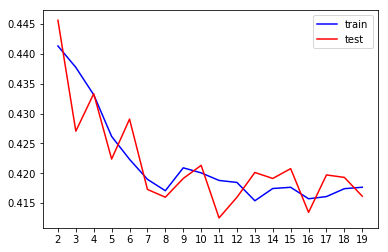

In [14]:
plt.plot(np.arange(2,20), Tr[:, 0], color="blue", label="train")
plt.plot(np.arange(2,20), Te[:, 0], color="red", label="test")
plt.legend()
plt.xticks(np.arange(2, 20));

In [15]:
MeTr = np.zeros(100)
MeTe = np.zeros(100)

for i in range(100):
    #print(i)
    X = window(ma3series, 11)
    np.random.shuffle(X)
    Xtrain, Xtest = split(X)
    Xtrainm, Xtestm = mask(Xtrain), mask(Xtest)
    cmodels[9].train(Xtrain)
    es = evalimpute(cmodels[9], Xtrain, Xtrainm)
    MeTr[i] = np.mean(es)
    es = evalimpute(cmodels[9], Xtest, Xtestm)
    MeTe[i] = np.mean(es)

(0.4, 0.5)

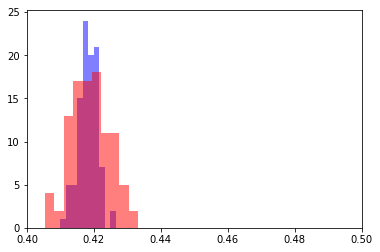

In [16]:
plt.hist(MeTr, fc=(0, 0, 1, 0.5))
plt.hist(MeTe, fc=(1, 0, 0, 0.5))
plt.xlim(0.4, 0.5)

In [17]:
MeTr = np.zeros(100)
MeTe = np.zeros(100)

for i in range(100):
    #print(i)
    X = window(ma3series, 3)
    np.random.shuffle(X)
    Xtrain, Xtest = split(X)
    Xtrainm, Xtestm = mask(Xtrain), mask(Xtest)
    cmodels[1].train(Xtrain)
    es = evalimpute(cmodels[1], Xtrain, Xtrainm)
    MeTr[i] = np.mean(es)
    es = evalimpute(cmodels[1], Xtest, Xtestm)
    MeTe[i] = np.mean(es)

(0.4, 0.5)

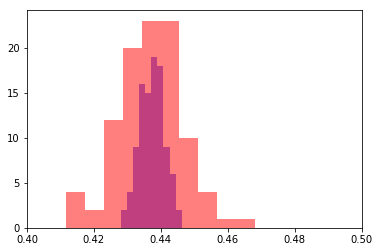

In [18]:
plt.hist(MeTr, fc=(0, 0, 1, 0.5))
plt.hist(MeTe, fc=(1, 0, 0, 0.5))
plt.xlim(0.4, 0.5)

In [24]:
MeTr = np.zeros(100)
MeTe = np.zeros(100)

for i in range(100):
    #print(i)
    X = window(ma3series, 19)
    np.random.shuffle(X)
    Xtrain, Xtest = split(X)
    Xtrainm, Xtestm = mask(Xtrain), mask(Xtest)
    cmodels[-1].train(Xtrain)
    es = evalimpute(cmodels[-1], Xtrain, Xtrainm)
    MeTr[i] = np.mean(es)
    es = evalimpute(cmodels[-1], Xtest, Xtestm)
    MeTe[i] = np.mean(es)

(0.4, 0.5)

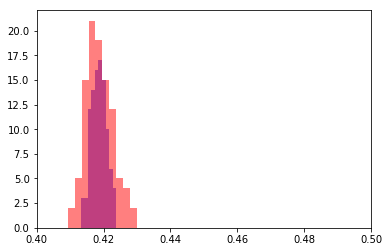

In [25]:
plt.hist(MeTr, fc=(0, 0, 1, 0.5))
plt.hist(MeTe, fc=(1, 0, 0, 0.5))
plt.xlim(0.4, 0.5)

In [26]:

ma3series = ARMA([], [0.5, 0.5, 0.5], np.random.normal(size=(10000)), np.array([0., 0.]))

In [27]:
cmodels = [un.CovarianceModel(d) for d in range(2, 20)]

In [28]:
Tr = np.zeros((len(cmodels), 1))
Te = np.zeros((len(cmodels), 1))
for (i, m) in enumerate(cmodels):
    X = window(ma3series, i+2)
    np.random.shuffle(X)
    Xtrain, Xtest = split(X)
    Xtrainm, Xtestm = mask(Xtrain), mask(Xtest)
    m.train(Xtrain)
    es = evalimpute(m, Xtrain, Xtrainm)
    Tr[i, 0] = np.mean(es)
    es = evalimpute(m, Xtest, Xtestm)
    Te[i, 0] = np.mean(es)

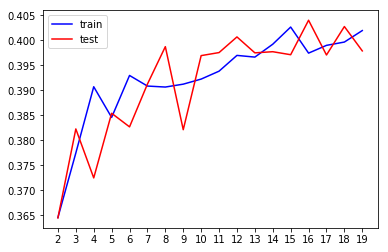

In [29]:
plt.plot(np.arange(2,20), Tr[:, 0], color="blue", label="train")
plt.plot(np.arange(2,20), Te[:, 0], color="red", label="test")
plt.legend()
plt.xticks(np.arange(2, 20));

In [30]:
MeTr = np.zeros(100)
MeTe = np.zeros(100)

for i in range(100):
    #print(i)
    X = window(ma3series, 2)
    np.random.shuffle(X)
    Xtrain, Xtest = split(X)
    Xtrainm, Xtestm = mask(Xtrain), mask(Xtest)
    cmodels[0].train(Xtrain)
    es = evalimpute(cmodels[0], Xtrain, Xtrainm)
    MeTr[i] = np.mean(es)
    es = evalimpute(cmodels[0], Xtest, Xtestm)
    MeTe[i] = np.mean(es)

(0.35, 0.45)

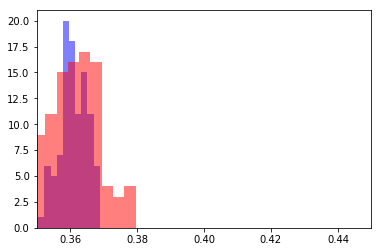

In [31]:
plt.hist(MeTr, fc=(0, 0, 1, 0.5))
plt.hist(MeTe, fc=(1, 0, 0, 0.5))
plt.xlim(0.35, 0.45)

In [32]:
MeTr = np.zeros(100)
MeTe = np.zeros(100)

for i in range(100):
    #print(i)
    X = window(ma3series, 3)
    np.random.shuffle(X)
    Xtrain, Xtest = split(X)
    Xtrainm, Xtestm = mask(Xtrain), mask(Xtest)
    cmodels[1].train(Xtrain)
    es = evalimpute(cmodels[1], Xtrain, Xtrainm)
    MeTr[i] = np.mean(es)
    es = evalimpute(cmodels[1], Xtest, Xtestm)
    MeTe[i] = np.mean(es)

(0.35, 0.45)

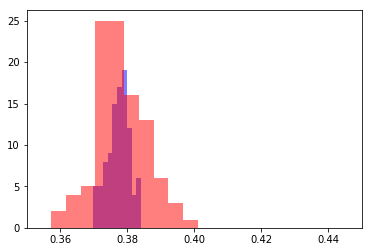

In [33]:
plt.hist(MeTr, fc=(0, 0, 1, 0.5))
plt.hist(MeTe, fc=(1, 0, 0, 0.5))
plt.xlim(0.35, 0.45)

In [63]:
twtrcsv = np.genfromtxt("/Users/Nick/Downloads/ether.csv", delimiter=",")[10:]

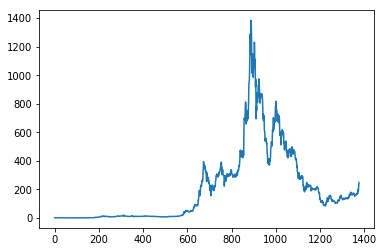

In [64]:
plt.plot(twtrcsv)

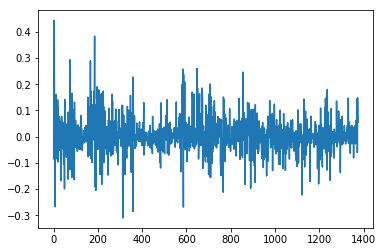

In [108]:
twtr = np.diff(np.log(twtrcsv))
plt.plot(twtr)

In [109]:
cmodels = [un.CovarianceModel(d) for d in range(2, 51)]

In [110]:
Tr = np.zeros((len(cmodels), 1))
Te = np.zeros((len(cmodels), 1))
for (i, m) in enumerate(cmodels):
    X = window(twtr, i+2)
    np.random.shuffle(X)
    Xtrain, Xtest = split(X)
    Xtrainm, Xtestm = mask(Xtrain), mask(Xtest)
    m.train(Xtrain)
    es = evalimpute(m, Xtrain, Xtrainm)
    print(np.mean(es))
    Tr[i, 0] = np.mean(es)
    es = evalimpute(m, Xtest, Xtestm)
    Te[i, 0] = np.mean(es)
    print(np.mean(es))

0.028521984541808012
0.028257726622517965
0.031145251207718983
0.034419917567506716
0.032985243045749985
0.035088418202126735
0.0349364715320039
0.03623337966543676
0.0365708184812976
0.03871505158081414
0.03680150407757729
0.03713998569252241
0.0380375351635334
0.03641461991694627
0.037962341200539124
0.03866301725834219
0.03814465703408214
0.039064491767799726
0.039326089394380065
0.038831188097061424
0.03829738543018815
0.0408512795296418
0.040040111346782176
0.03946196452380102
0.04009450118618523
0.04151768211086669
0.04031509789377774
0.03858051287669671
0.040326188857306225
0.041430207566304666
0.04123476892105459
0.040318737609795575
0.040713249603412854
0.03902046647376607
0.04074037036211845
0.042180113691815284
0.04061711143648104
0.04397556228830667
0.04103380239041976
0.03953225935038758
0.041351982915378595
0.042230262131918085
0.04074807517807182
0.04301553925186578
0.041200773894044015
0.04097127734056469
0.04170938455315346
0.04064745676206517
0.04144892964115717
0.042

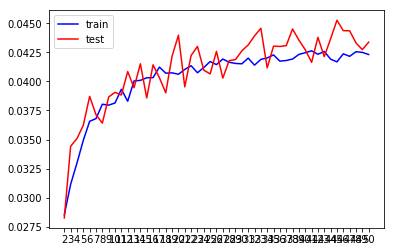

In [111]:
plt.plot(np.arange(2,51), Tr[:, 0], color="blue", label="train")
plt.plot(np.arange(2,51), Te[:, 0], color="red", label="test")
plt.legend()
plt.xticks(np.arange(2, 51));

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
[ 0.06277576  0.04154779 -0.04098398 -0.02188613 -0.04318974  0.02681833
 -0.00738011 -0.01767968  0.0642563  -0.01722893 -0.01982257  0.01644308
 -0.00243008 -0.00502809 -0.0208946  -0.05531769 -0.0284573  -0.02176564
  0.01639242 -0.0259799   0.00465847 -0.0094869  -0.06902815 -0.06101332
  0.02208467         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan]


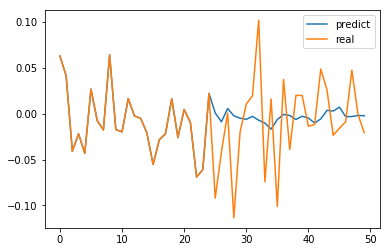

In [114]:
x = np.nan*np.ones(50)
print(x)
x[:25] = twtr[-105-200:-80-200]
print(x)
plt.plot(cmodels[-1].impute_nan(x), label="predict")
plt.plot(twtr[-105-200:-55-200], label="real")
plt.legend()

In [ ]:
plt.stem(x)